# Exploratory Data Analysis	Checking for and treating missing values
	Checking for and treating duplicate values
	Checking for and treating outliers (Data Distribution)
	Assumptions made about variables 
	Correlation Matrix (For Continous Variables)
	Tests of Independence (For Ordinal/Categorical Variables)
	Have the categorical/Ordinal variables been correctly encoded (If Necessary)
	Dimensionality Reduction/Feature Selection
	
	
# Data Modelling	Selection of model based on data distribution and types of input variables
	Sampling and Train Test split
	Hyper Parameter tuning to increase model performance
	Explanation of model performance (Based on hyper parameter tuning)
	
	
# Confusion Matrix	Presentation of Confusion matrix
	Explanation of metrics used. (Is accuracy enough? If Yes why? If No then what metric  will you use?
	Comparison of the 2 models 
	
## Final Remarks	Checking for correctness of assumptions about data and variables
	How can the model be improved? (Is more data required? Was the data of good quality to begin with?)

Context of the data
The data includes more than 30k entries from the hospital that has both categorical and quantitative features.

Content of the data
The headers describes  the columns of the data that has 18 different features. 

In [ ]:
#importing the relevant libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import os
#changing directories
from google.colab import drive
drive.mount("/content/gdrive")
os.getcwd()
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pandas.api.types import CategoricalDtype


#Exploratory Data Analysis Checking for and treating missing values

In [ ]:
#Reading the data set
main_data = pd.read_csv('/content/gdrive/My Drive/amma DATA FILES/healthcare_analytics_dataset.csv')
#viewing the data
main_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


drop - case id, patient id? ,

encoding - Hospital_type_code, Hospital_region_code, Department,	Ward_Type,	Ward_Facility_Code, Type of Admission, Severity of Illness, Age, Stay

change data type float to int - Bed Grade , City_Code_Patient , Admission_Deposit



In [ ]:
#understanding the datatypes of the dataset
main_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [ ]:
#converting the data columns to proper data types
main_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
#Drop 'case_id'

main_data.drop(['case_id'],axis=1, inplace=True) #0 row axis, 1 col axis, inplace will save it in maindata

In [ ]:
#Checking for duplicate values 

duplicateRowsDF = main_data[main_data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
        Hospital_code Hospital_type_code  ...  Admission_Deposit                Stay
1179               28                  b  ...             4944.0               31-40
2356               13                  a  ...             4025.0               71-80
2358               23                  a  ...             3538.0               51-60
15738              23                  a  ...             4469.0  More than 100 Days
15739              23                  a  ...             4469.0  More than 100 Days
...               ...                ...  ...                ...                 ...
289691             28                  b  ...             4502.0                0-10
295923              4                  a  ...             4151.0               21-30
298233             23                  a  ...             4181.0  More than 100 Days
298234             23                  a  ...             4181.0  More than 100 Days

In [ ]:
main_data.shape

(318438, 17)

In [ ]:
#Dropping duplicate rows from the main_data DataFrame

main_data.drop_duplicates(keep = False, inplace = True) 

In [ ]:
main_data.shape

(318314, 17)

In [ ]:
main_data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# Label Encoding

Changing the data types of the variables based on the whether they are categorical or numerical in nature.

In [ ]:
#Categorical Variables - Unordered
cat1=['Hospital_type_code', 'Hospital_region_code', 'Department','Ward_Type', 'Ward_Facility_Code','City_Code_Hospital','Bed Grade','City_Code_Patient','Hospital_code']
#Categorical Variables - Ordered
cat2=['Type of Admission', 'Severity of Illness', 'Age','Stay']

In [ ]:
#Change datatypes
for i in cat1:
    main_data[i]=main_data[i].astype('category')

for j in cat2:
    cat_type = CategoricalDtype(main_data[main_data[j].notna()][j].unique(), ordered=True)
    main_data[j]=main_data[j].astype(cat_type)

In [ ]:
main_data.dtypes

Hospital_code                        category
Hospital_type_code                   category
City_Code_Hospital                   category
Hospital_region_code                 category
Available Extra Rooms in Hospital       int64
Department                           category
Ward_Type                            category
Ward_Facility_Code                   category
Bed Grade                            category
patientid                               int64
City_Code_Patient                    category
Type of Admission                    category
Severity of Illness                  category
Visitors with Patient                   int64
Age                                  category
Admission_Deposit                     float64
Stay                                 category
dtype: object

Splitting data into categorical and numerical datatypes for further analysis

In [ ]:
df_cat=main_data.select_dtypes('category')

In [ ]:
df_cat.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,8,c,3,Z,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,51-60,41-50
2,10,e,1,X,anesthesia,S,E,2.0,7.0,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,51-60,41-50


In [ ]:
df_num=main_data.select_dtypes(include=['int64','float64'])

In [ ]:
df_num.head()

,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
0,3,31397,2,4911.0
1,2,31397,2,5954.0
2,2,31397,2,4745.0
3,2,31397,2,7272.0
4,2,31397,2,5558.0


Mask to encode categorical data, if missing value it is created as a seperate category, to avoid this we use mask.

In [ ]:
#Create mask for categorical data
mask=df_cat.isnull()

In [ ]:
df_cat.shape

(318314, 13)

In [ ]:
mask.shape

(318314, 13)


False - actual value present
True - Missing value

In [ ]:
mask

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,False,False,False,False,False,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,False,False,False
318435,False,False,False,False,False,False,False,False,False,False,False,False,False
318436,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Load Label Imputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Instantiate LabelEncoder
le=LabelEncoder()

In [ ]:
#Execute Label Encoder
df_cat_encoded=df_cat.astype(str).apply(le.fit_transform)

In [ ]:
df_cat_encoded.head(5)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,30,2,5,2,3,2,5,1,34,0,0,5,0
1,11,2,7,2,3,3,5,1,34,1,0,5,4
2,1,4,0,0,1,3,4,1,34,1,0,5,3
3,18,1,4,1,3,2,3,1,34,1,0,5,4
4,18,1,4,1,3,3,3,1,34,1,0,5,4


In [ ]:
df_cat_encoded=df_cat_encoded.where(~mask,df_cat)

In [ ]:
df_cat_encoded.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,30,2,5,2,3,2,5,1,34,0,0,5,0
1,11,2,7,2,3,3,5,1,34,1,0,5,4
2,1,4,0,0,1,3,4,1,34,1,0,5,3
3,18,1,4,1,3,2,3,1,34,1,0,5,4
4,18,1,4,1,3,3,3,1,34,1,0,5,4


In [ ]:
#Concat the numeric and categorical dataframe
main_data_encoded=pd.concat((df_cat_encoded,df_num),axis=1)

In [ ]:
main_data_encoded.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
0,30,2,5,2,3,2,5,1,34,0,0,5,0,3,31397,2,4911.0
1,11,2,7,2,3,3,5,1,34,1,0,5,4,2,31397,2,5954.0
2,1,4,0,0,1,3,4,1,34,1,0,5,3,2,31397,2,4745.0
3,18,1,4,1,3,2,3,1,34,1,0,5,4,2,31397,2,7272.0
4,18,1,4,1,3,3,3,1,34,1,0,5,4,2,31397,2,5558.0


In [ ]:
main_data_encoded.dtypes

Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                             object
City_Code_Patient                     object
Type of Admission                      int64
Severity of Illness                    int64
Age                                    int64
Stay                                   int64
Available Extra Rooms in Hospital      int64
patientid                              int64
Visitors with Patient                  int64
Admission_Deposit                    float64
dtype: object

# Missing Value Imputation

In [ ]:
 #Find missing values in each column
main_data_encoded.isna().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
City_Code_Patient                    4530
Type of Admission                       0
Severity of Illness                     0
Age                                     0
Stay                                    0
Available Extra Rooms in Hospital       0
patientid                               0
Visitors with Patient                   0
Admission_Deposit                       0
dtype: int64

In [ ]:
# Load KNN imputer
from sklearn.impute import KNNImputer

In [ ]:
#Instantiate KNN imputer
imputer=KNNImputer(n_neighbors=5,missing_values=np.nan)

np.nan cause you have to specifically take the missing vlues and not all the values.

In [ ]:
#Execute
main_data_imputed=pd.DataFrame(np.round(imputer.fit_transform(main_data_encoded)),columns=main_data_encoded.columns)

In [ ]:
main_data_imputed.head(10)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
0,30.0,2.0,5.0,2.0,3.0,2.0,5.0,1.0,34.0,0.0,0.0,5.0,0.0,3.0,31397.0,2.0,4911.0
1,11.0,2.0,7.0,2.0,3.0,3.0,5.0,1.0,34.0,1.0,0.0,5.0,4.0,2.0,31397.0,2.0,5954.0
2,1.0,4.0,0.0,0.0,1.0,3.0,4.0,1.0,34.0,1.0,0.0,5.0,3.0,2.0,31397.0,2.0,4745.0
3,18.0,1.0,4.0,1.0,3.0,2.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0,2.0,31397.0,2.0,7272.0
4,18.0,1.0,4.0,1.0,3.0,3.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0,2.0,31397.0,2.0,5558.0
5,15.0,0.0,8.0,0.0,1.0,3.0,5.0,1.0,34.0,1.0,0.0,5.0,1.0,2.0,31397.0,2.0,4449.0
6,25.0,5.0,10.0,1.0,3.0,3.0,1.0,2.0,34.0,0.0,0.0,5.0,0.0,1.0,31397.0,2.0,6167.0
7,15.0,0.0,8.0,0.0,3.0,1.0,5.0,2.0,34.0,1.0,0.0,5.0,4.0,4.0,31397.0,2.0,5571.0
8,0.0,3.0,1.0,1.0,2.0,2.0,1.0,3.0,34.0,1.0,0.0,5.0,5.0,2.0,31397.0,2.0,7223.0
9,1.0,4.0,0.0,0.0,2.0,3.0,4.0,2.0,34.0,1.0,0.0,5.0,3.0,2.0,31397.0,2.0,6056.0


In [ ]:
main_data_imputed.dtypes

Hospital_code                        float64
Hospital_type_code                   float64
City_Code_Hospital                   float64
Hospital_region_code                 float64
Department                           float64
Ward_Type                            float64
Ward_Facility_Code                   float64
Bed Grade                            float64
City_Code_Patient                    float64
Type of Admission                    float64
Severity of Illness                  float64
Age                                  float64
Stay                                 float64
Available Extra Rooms in Hospital    float64
patientid                            float64
Visitors with Patient                float64
Admission_Deposit                    float64
dtype: object

In [ ]:
for k in main_data_imputed.columns:
    main_data_imputed[k]=main_data_imputed[k].astype('object')

In [ ]:
main_data_imputed.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
0,30,2,5,2,3,2,5,1,34,0,0,5,0,3,31397,2,4911
1,11,2,7,2,3,3,5,1,34,1,0,5,4,2,31397,2,5954
2,1,4,0,0,1,3,4,1,34,1,0,5,3,2,31397,2,4745
3,18,1,4,1,3,2,3,1,34,1,0,5,4,2,31397,2,7272
4,18,1,4,1,3,3,3,1,34,1,0,5,4,2,31397,2,5558


In [ ]:
for i in cat1:
    main_data_imputed[i]=main_data_imputed[i].astype('category')

for j in cat2:
    cat_type = CategoricalDtype(main_data_imputed[main_data_imputed[j].notna()][j].unique(), ordered=True)
    main_data_imputed[j]=main_data_imputed[j].astype(cat_type)

In [ ]:
for k in df_num.columns:
    main_data_imputed[k]=main_data_imputed[k].astype(df_num[k].dtype)

In [ ]:
main_data_imputed.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Stay                                 0
Available Extra Rooms in Hospital    0
patientid                            0
Visitors with Patient                0
Admission_Deposit                    0
dtype: int64

In [ ]:
main_data_imputed.dtypes

Hospital_code                        category
Hospital_type_code                   category
City_Code_Hospital                   category
Hospital_region_code                 category
Department                           category
Ward_Type                            category
Ward_Facility_Code                   category
Bed Grade                            category
City_Code_Patient                    category
Type of Admission                    category
Severity of Illness                  category
Age                                  category
Stay                                 category
Available Extra Rooms in Hospital       int64
patientid                               int64
Visitors with Patient                   int64
Admission_Deposit                     float64
dtype: object

In [ ]:
main_data_imputed.drop('patientid', axis=1, inplace=True)

# Outlier Analysis

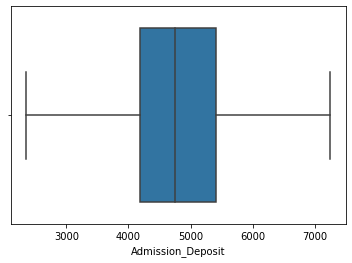

In [ ]:
#Outlier analysis using the boxplot function 
sns.boxplot(main_data_imputed['Admission_Deposit'])

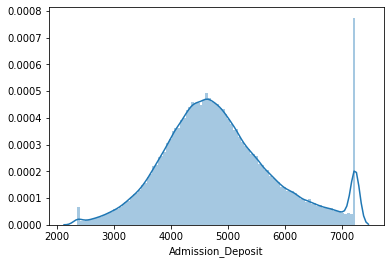

In [ ]:
sns.distplot(main_data_imputed['Admission_Deposit'],bins=100)

In [ ]:
# Admission_Deposit
#Step 1: Get the upper and lower quartile and IQR
q3_Admission_Deposit=main_data_imputed['Admission_Deposit'].quantile(.75)
q1_Admission_Deposit=main_data_imputed['Admission_Deposit'].quantile(.25)

In [ ]:
#Get IQR
iqr_Admission_Deposit= q3_Admission_Deposit-q1_Admission_Deposit

In [ ]:
# Step 2: Get upper and lower limits 
upper_Admission_Deposit=q3_Admission_Deposit+(1.5*iqr_Admission_Deposit)
lower_Admission_Deposit=q1_Admission_Deposit-(1.5*iqr_Admission_Deposit)

In [ ]:
print(upper_Admission_Deposit,lower_Admission_Deposit)

7243.5 2351.5


In [ ]:
#Step 3: Capping and Flooring
main_data_imputed['Admission_Deposit']=np.where(main_data_imputed['Admission_Deposit']>upper_Admission_Deposit,upper_Admission_Deposit,main_data_imputed['Admission_Deposit'])
main_data_imputed['Admission_Deposit']=np.where(main_data_imputed['Admission_Deposit']<lower_Admission_Deposit,lower_Admission_Deposit,main_data_imputed['Admission_Deposit'])

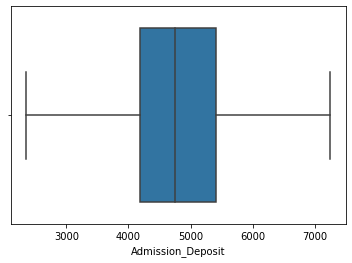

In [ ]:
sns.boxplot(main_data_imputed['Admission_Deposit'])

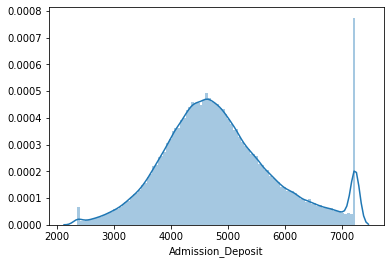

In [ ]:
sns.distplot(main_data_imputed['Admission_Deposit'],bins=100)

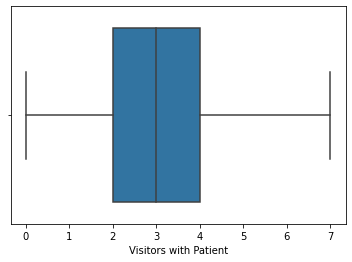

In [ ]:
#Outlier analysis using the boxplot function 
sns.boxplot(main_data_imputed['Visitors with Patient'])

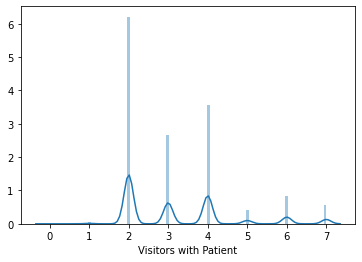

In [ ]:
sns.distplot(main_data_imputed['Visitors with Patient'],bins=100)

In [ ]:
# Visitors with Patient
#Step 1: Get the upper and lower quartile and IQR
q3_visitors=main_data_imputed['Visitors with Patient'].quantile(.75)
q1_visitors=main_data_imputed['Visitors with Patient'].quantile(.25)

In [ ]:
#Get IQR
iqr_visitors= q3_visitors-q1_visitors

In [ ]:
# Step 2: Get upper and lower limits 
upper_visitors=q3_visitors+(1.5*iqr_visitors)
lower_visitors=q1_visitors-(1.5*iqr_visitors)

In [ ]:
print(upper_visitors,lower_visitors)

7.0 -1.0


In [ ]:
#Step 3: Capping and Flooring
main_data_imputed['Visitors with Patient']=np.where(main_data_imputed['Visitors with Patient']>upper_visitors,upper_visitors,main_data_imputed['Visitors with Patient'])
main_data_imputed['Visitors with Patient']=np.where(main_data_imputed['Visitors with Patient']<lower_visitors,lower_visitors,main_data_imputed['Visitors with Patient'])

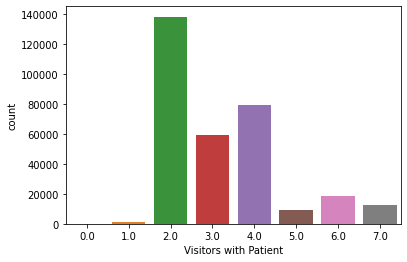

In [ ]:
sns.countplot(main_data_imputed['Visitors with Patient'])

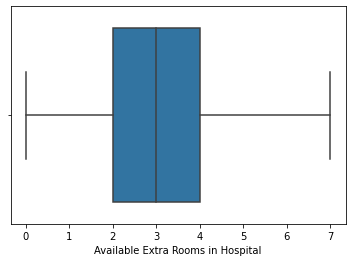

In [ ]:
#Outlier analysis using the boxplot function 
sns.boxplot(main_data_imputed['Available Extra Rooms in Hospital'])

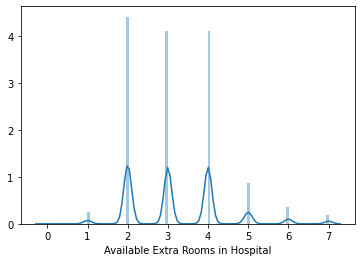

In [ ]:
sns.distplot(main_data_imputed['Available Extra Rooms in Hospital'],bins=100)

In [ ]:
# Visitors with Patient
#Step 1: Get the upper and lower quartile and IQR
q3_rooms=main_data_imputed['Available Extra Rooms in Hospital'].quantile(.75)
q1_rooms=main_data_imputed['Available Extra Rooms in Hospital'].quantile(.25)

In [ ]:
#Get IQR
iqr_rooms= q3_rooms-q1_rooms

In [ ]:
# Step 2: Get upper and lower limits 
upper_rooms=q3_rooms+(1.5*iqr_rooms)
lower_rooms=q1_rooms-(1.5*iqr_rooms)

In [ ]:
print(upper_rooms,lower_rooms)

7.0 -1.0


In [ ]:
#Step 3: Capping and Flooring
main_data_imputed['Available Extra Rooms in Hospital']=np.where(main_data_imputed['Available Extra Rooms in Hospital']>upper_rooms,upper_rooms,main_data_imputed['Available Extra Rooms in Hospital'])
main_data_imputed['Available Extra Rooms in Hospital']=np.where(main_data_imputed['Available Extra Rooms in Hospital']<lower_rooms,lower_rooms,main_data_imputed['Available Extra Rooms in Hospital'])

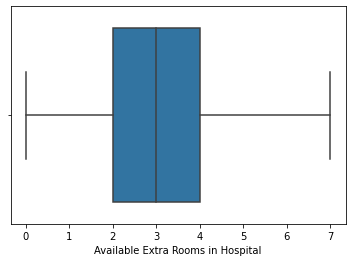

In [ ]:
sns.boxplot(main_data_imputed['Available Extra Rooms in Hospital'])

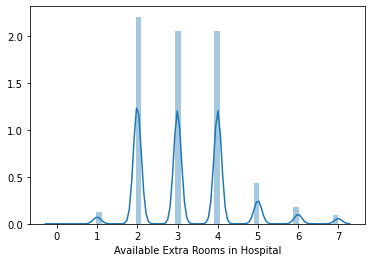

In [ ]:
sns.distplot(main_data_imputed['Available Extra Rooms in Hospital'])

In [ ]:
main_data_imputed.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age', 'Stay',
       'Available Extra Rooms in Hospital', 'patientid',
       'Visitors with Patient', 'Admission_Deposit'],
      dtype='object')

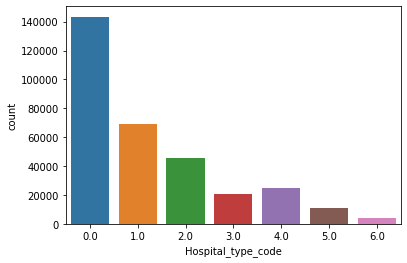

In [ ]:
# Distribution of labels
sns.countplot(main_data_imputed['Hospital_type_code'])

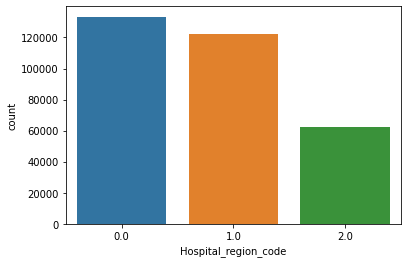

In [ ]:
# Distribution of labels
sns.countplot(main_data_imputed['Hospital_region_code'])

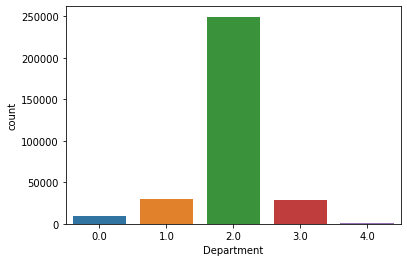

In [ ]:
sns.countplot(main_data_imputed['Department'])

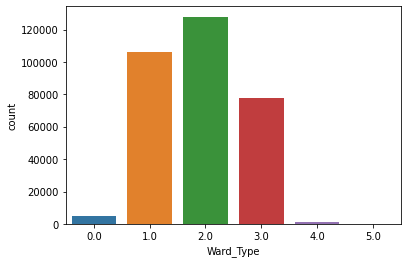

In [ ]:
sns.countplot(main_data_imputed['Ward_Type'])

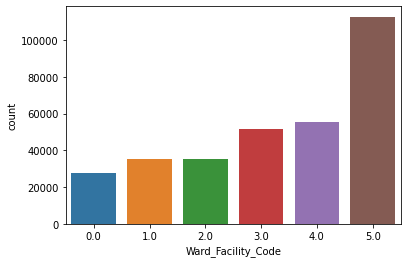

In [ ]:
sns.countplot(main_data_imputed['Ward_Facility_Code'])

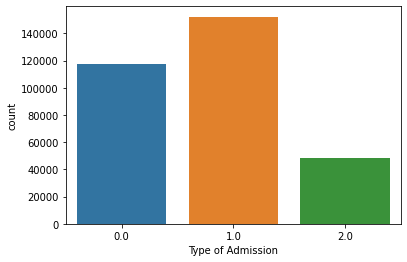

In [ ]:
sns.countplot(main_data_imputed['Type of Admission'])

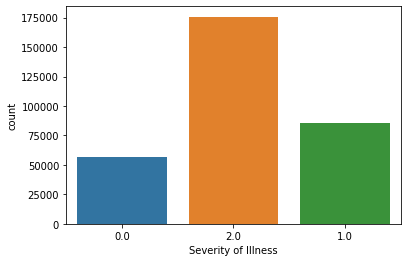

In [ ]:
sns.countplot(main_data_imputed['Severity of Illness'])

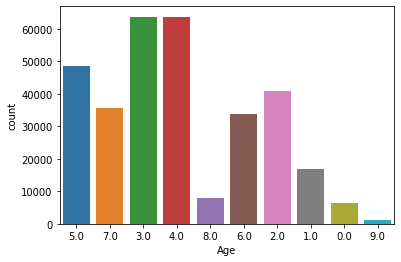

In [ ]:
sns.countplot(main_data_imputed['Age'])

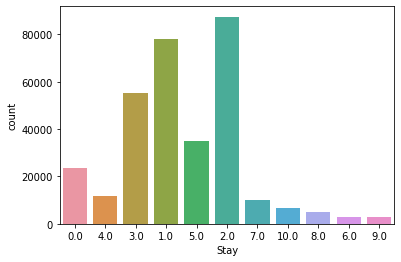

In [ ]:
sns.countplot(main_data_imputed['Stay'])

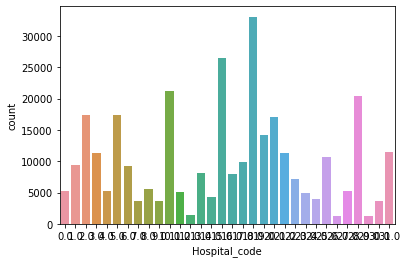

In [ ]:
sns.countplot(main_data_imputed['Hospital_code'])

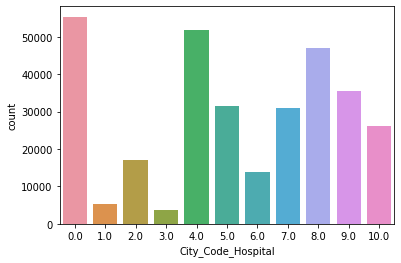

In [ ]:
sns.countplot(main_data_imputed['City_Code_Hospital'])

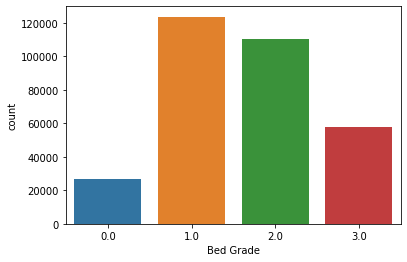

In [ ]:
sns.countplot(main_data_imputed['Bed Grade'])

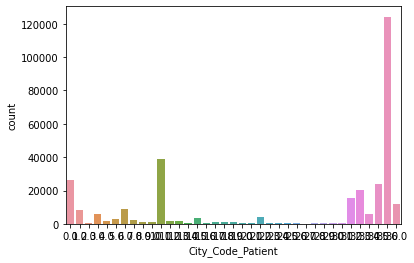

In [ ]:
sns.countplot(main_data_imputed['City_Code_Patient'])

# Multi Colinearity Treatment

In [ ]:
df_num.drop('patientid', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NUMERICAL-NUMERICAL

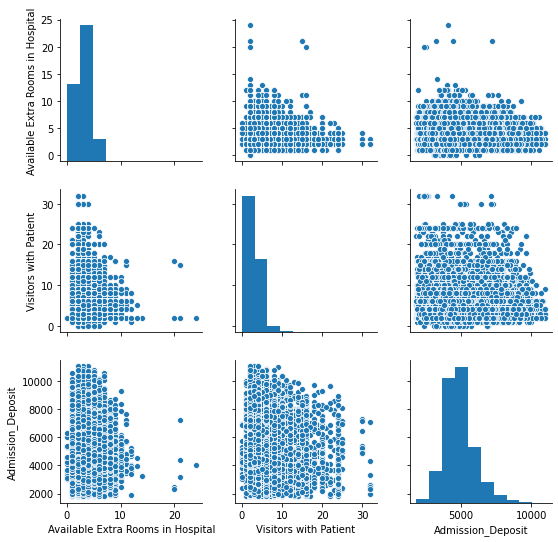

In [ ]:
#Look at the scatterplots of numerical variables- sns.pairplot
sns.pairplot(df_num)

What kind of Correlation should we use

In [ ]:
#Find correlation matrix
corr1=main_data_imputed.corr(method='spearman')
corr1

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit
Available Extra Rooms in Hospital,1.000000,0.140933,-0.169918
Visitors with Patient,0.140933,1.000000,-0.213868
Admission_Deposit,-0.169918,-0.213868,1.000000


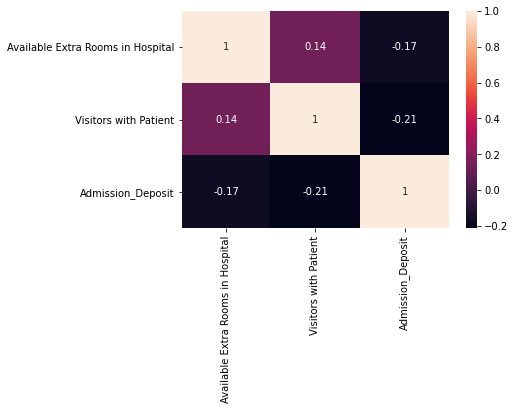

In [ ]:
#Create heatmap of correlation matrix
sns.heatmap(corr1,annot=True)

NUMERIC-CATEGORICAL (Check for Independence)

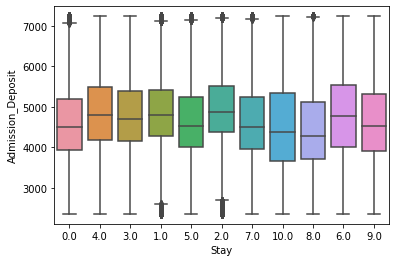

In [ ]:
#Let's look at multi-collinearity for numeric-categorical data
#sns.boxplot(x=,y=)
sns.boxplot(x=main_data_imputed['Stay'],y=main_data_imputed['Admission_Deposit'])

Since the median values are neither decreaing or increasing, hence fairly independent.

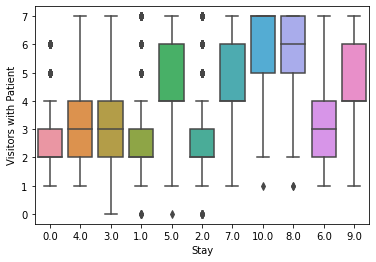

In [ ]:
sns.boxplot(x=main_data_imputed['Stay'],y=main_data_imputed['Visitors with Patient'])

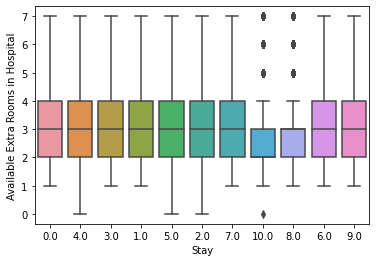

In [ ]:
sns.boxplot(x=main_data_imputed['Stay'],y=main_data_imputed['Available Extra Rooms in Hospital'])

In [ ]:
from scipy import stats
coeff1,p1=stats.spearmanr(main_data_imputed['Stay'],main_data_imputed['Admission_Deposit'])

In [ ]:
np.round(coeff1,3)

-0.057

In [ ]:
coeff2,p1=stats.spearmanr(main_data_imputed['Stay'],main_data_imputed['Visitors with Patient'])
np.round(coeff2,3)

0.422

In [ ]:
coeff3,p1=stats.spearmanr(main_data_imputed['Stay'],main_data_imputed['Available Extra Rooms in Hospital'])
np.round(coeff3,3)

-0.109

In [ ]:
#Categorical-Categorical
from scipy.stats import chi2_contingency

Categorical-Categorical (Checking for Independence)

In [ ]:
cat1

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'City_Code_Hospital',
 'Bed Grade',
 'City_Code_Patient',
 'Hospital_code']

In [ ]:
df_cat_imputed=main_data_imputed.select_dtypes('category')
df_cat_imputed

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,30.0,2.0,5.0,2.0,3.0,2.0,5.0,1.0,34.0,0.0,0.0,5.0,0.0
1,11.0,2.0,7.0,2.0,3.0,3.0,5.0,1.0,34.0,1.0,0.0,5.0,4.0
2,1.0,4.0,0.0,0.0,1.0,3.0,4.0,1.0,34.0,1.0,0.0,5.0,3.0
3,18.0,1.0,4.0,1.0,3.0,2.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0
4,18.0,1.0,4.0,1.0,3.0,3.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318309,28.0,0.0,8.0,0.0,3.0,1.0,5.0,3.0,14.0,0.0,2.0,4.0,1.0
318310,16.0,0.0,0.0,0.0,1.0,1.0,4.0,3.0,35.0,2.0,2.0,8.0,3.0
318311,29.0,0.0,6.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,1.0,7.0,1.0
318312,2.0,1.0,4.0,1.0,1.0,1.0,3.0,2.0,35.0,1.0,1.0,1.0,1.0


In [ ]:
def cramers_V(var1,var2) :
  matrix1=pd.crosstab(df_cat_imputed[var1],df_cat_imputed[var2])
  chi2,r,dof,matrix=chi2_contingency(matrix1)
  n = matrix1.sum().sum() 
  phi2 = chi2/n 
  r,k = matrix1.shape 
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  cram_v=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
  return cram_v

  


In [ ]:
rows= []

for var1 in df_cat_imputed:
  col = []
  for var2 in df_cat_imputed :
    cramers =cramers_V(var1,var2)
    col.append(round(cramers,3)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramersV = pd.DataFrame(cramers_results, columns = df_cat_imputed.columns, index =df_cat_imputed.columns)

df_cramersV

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
Hospital_code,1.000,1.000,1.000,1.000,0.083,0.385,1.000,0.121,0.130,0.259,0.062,0.022,0.075
Hospital_type_code,1.000,1.000,0.744,0.739,0.031,0.187,0.657,0.046,0.170,0.092,0.013,0.014,0.054
City_Code_Hospital,1.000,0.744,1.000,1.000,0.070,0.252,0.985,0.099,0.222,0.198,0.050,0.017,0.051
Hospital_region_code,1.000,0.739,1.000,1.000,0.057,0.192,0.847,0.077,0.378,0.096,0.039,0.018,0.043
Department,0.083,0.031,0.070,0.057,1.000,0.021,0.058,0.089,0.040,0.104,0.036,0.084,0.035
Ward_Type,0.385,0.187,0.252,0.192,0.021,1.000,0.170,0.022,0.075,0.060,0.021,0.030,0.107
Ward_Facility_Code,1.000,0.657,0.985,0.847,0.058,0.170,1.000,0.096,0.237,0.196,0.048,0.017,0.068
Bed Grade,0.121,0.046,0.099,0.077,0.089,0.022,0.096,1.000,0.062,0.110,0.271,0.071,0.084
City_Code_Patient,0.130,0.170,0.222,0.378,0.040,0.075,0.237,0.062,1.000,0.097,0.079,0.046,0.035
Type of Admission,0.259,0.092,0.198,0.096,0.104,0.060,0.196,0.110,0.097,1.000,0.045,0.088,0.123


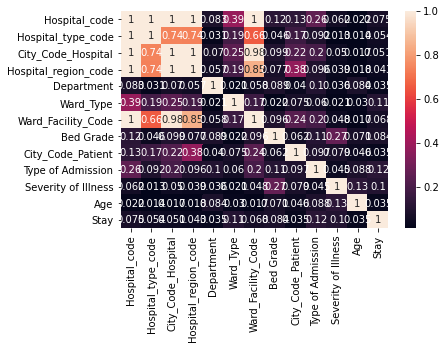

In [ ]:
sns.heatmap(df_cramersV, annot=True)

In [ ]:
main_data_imputed.drop(['Hospital_code','City_Code_Hospital','Hospital_region_code','Ward_Type'],axis=1, inplace=True)

In [ ]:
main_data_imputed.drop(['Ward_Facility_Code'],axis=1, inplace=True)

Rerunning Cramer's after dropping variables

In [ ]:
df_cat_imputed=main_data_imputed.select_dtypes('category')
df_cat_imputed

,Hospital_type_code,Department,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,2.0,3.0,1.0,34.0,0.0,0.0,5.0,0.0
1,2.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0
2,4.0,1.0,1.0,34.0,1.0,0.0,5.0,3.0
3,1.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0
4,1.0,3.0,1.0,34.0,1.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...
318309,0.0,3.0,3.0,14.0,0.0,2.0,4.0,1.0
318310,0.0,1.0,3.0,35.0,2.0,2.0,8.0,3.0
318311,0.0,2.0,3.0,1.0,0.0,1.0,7.0,1.0
318312,1.0,1.0,2.0,35.0,1.0,1.0,1.0,1.0


In [ ]:
def cramers_V(var1,var2) :
  matrix1=pd.crosstab(df_cat_imputed[var1],df_cat_imputed[var2])
  chi2,r,dof,matrix=chi2_contingency(matrix1)
  n = matrix1.sum().sum() 
  phi2 = chi2/n 
  r,k = matrix1.shape 
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  cram_v=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
  return cram_v

  


In [ ]:
rows= []

for var1 in df_cat_imputed:
  col = []
  for var2 in df_cat_imputed :
    cramers =cramers_V(var1,var2)
    col.append(round(cramers,3)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramersV = pd.DataFrame(cramers_results, columns = df_cat_imputed.columns, index =df_cat_imputed.columns)

df_cramersV

,Hospital_type_code,Department,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
Hospital_type_code,1.000,0.031,0.046,0.170,0.092,0.013,0.014,0.054
Department,0.031,1.000,0.089,0.040,0.104,0.036,0.084,0.035
Bed Grade,0.046,0.089,1.000,0.062,0.110,0.271,0.071,0.084
City_Code_Patient,0.170,0.040,0.062,1.000,0.097,0.079,0.046,0.035
Type of Admission,0.092,0.104,0.110,0.097,1.000,0.045,0.088,0.123
Severity of Illness,0.013,0.036,0.271,0.079,0.045,1.000,0.132,0.102
Age,0.014,0.084,0.071,0.046,0.088,0.132,1.000,0.035
Stay,0.054,0.035,0.084,0.035,0.123,0.102,0.035,1.000


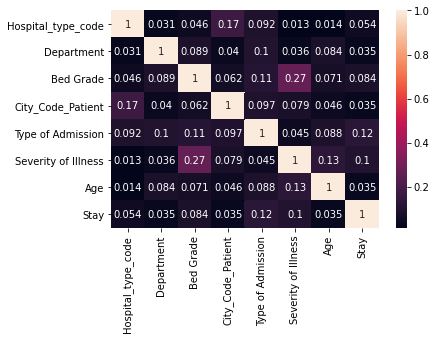

In [ ]:
sns.heatmap(df_cramersV, annot=True)

In [ ]:
#Checking for duplicate values 

duplicateRowsDF = main_data_imputed[main_data_imputed.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
       Hospital_type_code Department  ... Visitors with Patient Admission_Deposit
576                   0.0        2.0  ...                   4.0            4414.0
5529                  1.0        2.0  ...                   2.0            7243.5
6932                  1.0        2.0  ...                   2.0            7243.5
7821                  0.0        1.0  ...                   4.0            7243.5
8265                  0.0        2.0  ...                   2.0            7243.5
...                   ...        ...  ...                   ...               ...
315989                0.0        2.0  ...                   4.0            7243.5
316516                0.0        2.0  ...                   2.0            4941.0
317307                1.0        2.0  ...                   2.0            7243.5
317679                1.0        2.0  ...                   3.0            7243.5
317730                0.0       

In [ ]:
#Dropping duplicate rows from the main_data DataFrame

main_data_imputed.drop_duplicates(keep = False, inplace = True) 

# Class Imbalance

In [ ]:
#LOAD
from imblearn.over_sampling import SMOTE

In [ ]:
#INITIALIZE
smote =SMOTE()

In [ ]:
#For this method we need to split the data into the feature and target variables
x= main_data_imputed[main_data_imputed.columns.difference(['Stay'])]
y= main_data_imputed['Stay']

In [ ]:
x.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Department,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient
0,4911.0,5.0,3.0,1.0,34.0,3.0,2.0,0.0,0.0,2.0
1,5954.0,5.0,2.0,1.0,34.0,3.0,2.0,0.0,1.0,2.0
2,4745.0,5.0,2.0,1.0,34.0,1.0,4.0,0.0,1.0,2.0
3,7243.5,5.0,2.0,1.0,34.0,3.0,1.0,0.0,1.0,2.0
4,5558.0,5.0,2.0,1.0,34.0,3.0,1.0,0.0,1.0,2.0


In [ ]:
y.head()

0    0.0
1    4.0
2    3.0
3    4.0
4    4.0
Name: Stay, dtype: category
Categories (11, float64): [0.0 < 4.0 < 3.0 < 1.0 ... 10.0 < 8.0 < 6.0 < 9.0]

In [ ]:
#EXECUTE
x_smote,y_smote=smote.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

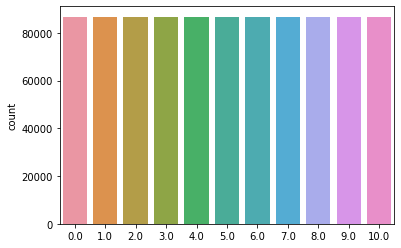

In [ ]:
#Check Final Distributions of lables
sns.countplot(y_smote)

In [ ]:
df_smoted = pd.concat([pd.DataFrame(x_smote,columns=x.columns), pd.DataFrame(y_smote, columns=['Stay'])], axis=1)

In [ ]:
df_smoted.shape

(954723, 11)

In [ ]:
df_smoted.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Department,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient,Stay
0,4911.0,5.0,3.0,1.0,34.0,3.0,2.0,0.0,0.0,2.0,0.0
1,5954.0,5.0,2.0,1.0,34.0,3.0,2.0,0.0,1.0,2.0,4.0
2,4745.0,5.0,2.0,1.0,34.0,1.0,4.0,0.0,1.0,2.0,3.0
3,7243.5,5.0,2.0,1.0,34.0,3.0,1.0,0.0,1.0,2.0,4.0
4,5558.0,5.0,2.0,1.0,34.0,3.0,1.0,0.0,1.0,2.0,4.0


In [ ]:
main_data_imputed.shape

(316761, 11)

Creating a sample data frame for further processes

In [ ]:
df_sample=df_smoted.sample(frac=0.05,replace=True,random_state=1)
df_sample.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Department,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient,Stay
128037,6253.000000,2.000000,4.000000,3.000000,35.000000,1.000000,0.000000,2.000000,0.000000,4.000000,1.0
491755,4736.000000,3.313575,4.000000,1.156787,34.156787,2.000000,0.843213,2.000000,0.000000,3.156787,4.0
470924,3434.520960,3.826347,3.413173,1.000000,11.173653,1.173653,1.760480,0.413173,1.586827,5.173653,4.0
791624,7221.840484,5.587239,2.206381,2.206381,10.000000,3.000000,0.000000,2.000000,1.000000,5.968097,9.0
491263,5731.244914,5.489828,2.000000,1.489828,35.000000,1.000000,0.755086,1.755086,1.000000,2.000000,4.0


In [ ]:
df_sample.shape

(47736, 11)

Checking for imbalance

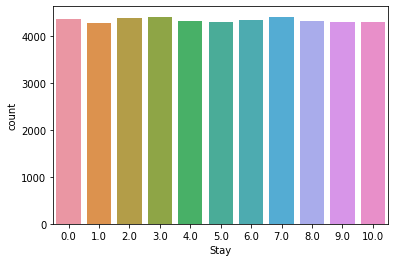

In [ ]:
sns.countplot(df_sample['Stay'])

In [ ]:
for i in df_sample.columns:
  df_sample[i]=df_sample[i].astype('category')
for k in df_num.columns:
    df_sample[k]=df_sample[k].astype(df_num[k].dtype)

In [ ]:
df_sample.dtypes

Admission_Deposit                     float64
Age                                  category
Available Extra Rooms in Hospital       int64
Bed Grade                            category
City_Code_Patient                    category
Department                           category
Hospital_type_code                   category
Severity of Illness                  category
Type of Admission                    category
Visitors with Patient                   int64
Stay                                 category
dtype: object

Modelling Phase

Taining sample data 

In [ ]:
#For this method we need to split the data into the feature and target variables
x= df_sample[df_sample.columns.difference(['Stay'])]
y= df_sample['Stay']

In [ ]:
#Divide into train test splits:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Department,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient
430978,5189.347452,1.652548,2,2.000000,4.305095,1.652548,1.652548,1.000000,1.347452,2
927217,3768.229762,5.708095,3,0.708095,0.354048,1.645952,0.354048,0.708095,0.645952,6
204913,4344.000000,6.000000,2,1.000000,32.000000,2.000000,1.000000,2.000000,1.000000,2
752830,5526.673240,6.756978,3,2.756978,7.569782,1.756978,0.000000,2.000000,1.000000,6
343860,4393.000000,3.713715,3,1.572570,10.713715,2.000000,1.713715,1.713715,1.000000,2


In [ ]:
y_train.head()

430978     4.0
927217    10.0
204913     3.0
752830     8.0
343860     0.0
Name: Stay, dtype: category
Categories (11, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.0, 8.0, 9.0, 10.0]

ADA boost

In [ ]:
# LOAD classifier from ENSEMBLE family
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Initialize Classifier and fit to x_train and y_train (Execute Step)
ada_boost = AdaBoostClassifier(n_estimators=500,learning_rate=.5,random_state=10).fit(x_train,y_train)

In [ ]:
#Make predictions on x_test
pred1=ada_boost.predict(x_test)

In [ ]:
pred1

array([ 3., 10.,  9., ...,  2., 10.,  6.])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Confusion matrix
pd.crosstab(pred1,y_test)
#Get performance metrics
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

         0.0       0.49      0.36      0.42      1809
         1.0       0.42      0.35      0.38      1556
         2.0       0.27      0.44      0.34       819
         3.0       0.19      0.20      0.20      1261
         4.0       0.21      0.29      0.24       889
         5.0       0.23      0.30      0.26       999
         6.0       0.36      0.27      0.31      1722
         7.0       0.13      0.25      0.17       724
         8.0       0.39      0.32      0.35      1539
         9.0       0.32      0.26      0.29      1599
        10.0       0.42      0.38      0.40      1404

    accuracy                           0.31     14321
   macro avg       0.31      0.31      0.30     14321
weighted avg       0.34      0.31      0.32     14321



Gradient Boosting

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(max_depth=10, n_estimators=50,verbose=1).fit(x_train,y_train)
pred2=gb_clf.predict(x_test)

#Confusion matrix
pd.crosstab(pred2,y_test)
#Get performance metrics
print(classification_report(pred2,y_test))


      Iter       Train Loss   Remaining Time 
         1       71564.9732            2.01m
         2       65980.1040            2.04m
         3       61468.8263            2.03m
         4       57744.1024            2.01m
         5       54527.0777            1.98m
         6       51729.6511            1.95m
         7       49289.4845            1.91m
         8       47072.4676            1.87m
         9       45095.6127            1.83m
        10       43283.2735            1.78m
        20       31165.6650            1.34m
        30       24463.0290           53.55s
        40       20525.5432           26.70s
        50       17477.7017            0.00s
              precision    recall  f1-score   support

         0.0       0.47      0.44      0.46      1427
         1.0       0.37      0.35      0.36      1380
         2.0       0.52      0.40      0.45      1718
         3.0       0.17      0.26      0.20       839
         4.0       0.39      0.36      0.38      1329

RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#initialize
rf_clf=RandomForestClassifier(n_estimators=500,max_depth=18,max_features='sqrt')

In [ ]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred2= rf_clf.predict(x_test)

In [ ]:
pred2

array([7., 8., 6., ..., 1., 8., 6.])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Confusion matrix
pd.crosstab(y_test,pred2)

col_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Stay,,,,,,,,,,,
0.0,657,180,160,38,165,13,98,9,1,5,2
1.0,128,515,405,87,50,62,13,17,12,5,4
2.0,55,378,721,96,15,34,3,7,7,2,4
3.0,120,158,268,203,138,160,71,74,55,47,28
4.0,212,61,102,38,481,34,193,54,19,48,13
5.0,64,67,87,112,73,322,54,190,165,117,68
6.0,119,15,50,23,248,24,552,83,63,89,34
7.0,60,17,26,37,68,150,66,426,175,221,92
8.0,24,6,5,24,23,55,40,81,768,63,167


In [ ]:
#Get performance metrics
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

         0.0       0.49      0.44      0.46      1510
         1.0       0.40      0.37      0.38      1407
         2.0       0.55      0.39      0.46      1837
         3.0       0.15      0.29      0.20       694
         4.0       0.38      0.36      0.37      1348
         5.0       0.24      0.33      0.28       967
         6.0       0.42      0.46      0.44      1205
         7.0       0.32      0.34      0.33      1239
         8.0       0.61      0.44      0.51      1761
         9.0       0.41      0.44      0.43      1224
        10.0       0.49      0.55      0.52      1129

    accuracy                           0.41     14321
   macro avg       0.41      0.40      0.40     14321
weighted avg       0.43      0.41      0.41     14321



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,pred2)
print(confusion_matrix)

[[657 180 160  38 165  13  98   9   1   5   2]
 [128 515 405  87  50  62  13  17  12   5   4]
 [ 55 378 721  96  15  34   3   7   7   2   4]
 [120 158 268 203 138 160  71  74  55  47  28]
 [212  61 102  38 481  34 193  54  19  48  13]
 [ 64  67  87 112  73 322  54 190 165 117  68]
 [119  15  50  23 248  24 552  83  63  89  34]
 [ 60  17  26  37  68 150  66 426 175 221  92]
 [ 24   6   5  24  23  55  40  81 768  63 167]
 [ 41   7   8  24  63  67  77 211 178 544  99]
 [ 30   3   5  12  24  46  38  87 318  83 618]]


In [ ]:
rf_clf.feature_importances_

array([0.16516864, 0.12429856, 0.0545312 , 0.10215886, 0.10857877,
       0.06218183, 0.09941597, 0.08060664, 0.08841394, 0.11464558])